In [1]:
### Done by Shanidze Davyd FB-41mn

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import json
tf.random.set_seed(1)

## Sequential Model

### Model 1

In [72]:
model_1 = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(3, activation="softmax") # 3 output classes
])

In [73]:
model_1.build(input_shape=(None, 5)) # 5 input features
model_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

### model_2 = keras.Sequential()

In [74]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(32, activation="relu"))
model_2.add(layers.Dense(3, activation="softmax"))

model_2.build(input_shape=(None, 5)) 

### Functional API

In [75]:
inputs = keras.Input(shape=(5,))
features = layers.Dense(32, activation="relu")(inputs)
outputs = layers.Dense(3, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [76]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

## Linear Regression

In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [78]:
data = pd.read_csv(os.path.join(path, "gym_members_exercise_tracking.csv"))
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [79]:
# Check for missing values
print(data.isnull().sum())

# Filling missing values by the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop rows with missing categorical values
data = data.dropna()
data = data.drop(['Gender', 'Workout_Type'], axis=1)
data.head()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [92]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Experience_Level'])
X = data.drop('Experience_Level', axis=1)
data = data.drop(['Experience_Level'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
num_classes = len(np.unique(y))
print(f"{num_classes=}")

num_classes=3


Text(0.5, 1.0, 'Linear Regression Problem')

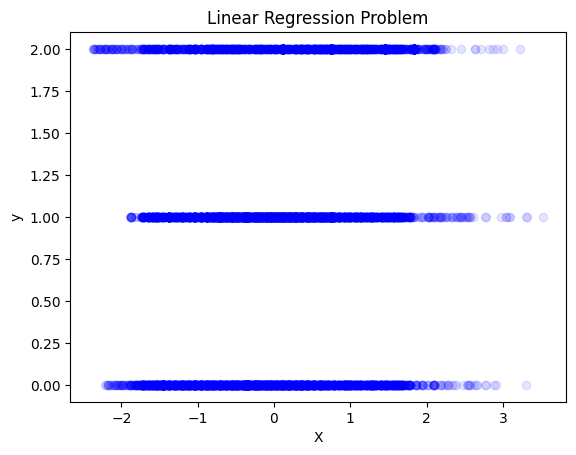

In [94]:
# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Problem')

In [95]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    layers.Dense(n_classes, activation='softmax')
])

In [96]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,867 (50.26 KB)

 Trainable params: 12,419 (48.51 KB)

 Non-trainable params: 448 (1.75 KB)

In [97]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

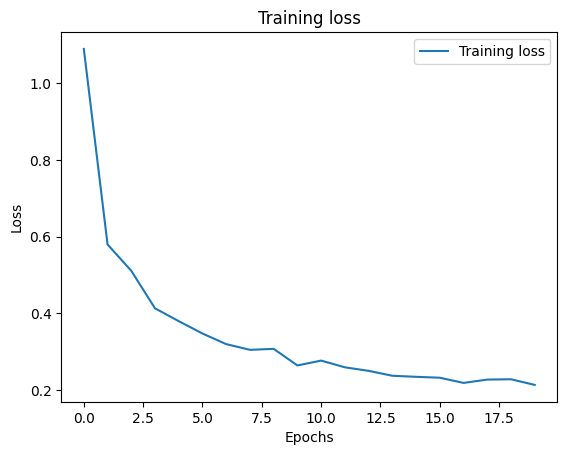

In [98]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 0)
history_dict = history.history
train_loss_values = history_dict["loss"]

plt.plot(train_loss_values, label="Training loss")

plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [99]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,707 (147.30 KB)

 Trainable params: 12,419 (48.51 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 24,840 (97.04 KB)

In [118]:
history = model.fit(
    X_train, y_train,
    epochs=100,
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9706 - loss: 0.0822 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9651 - loss: 0.0814 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9670 - loss: 0.0789 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0615 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9476 - loss: 0.0992 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.0839 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.0958 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.0831 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.0792 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9671 - loss: 0.0866 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.0729 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [119]:
y_model = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [120]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.3f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9239 - loss: 0.3167 

Test accuracy: 0.918


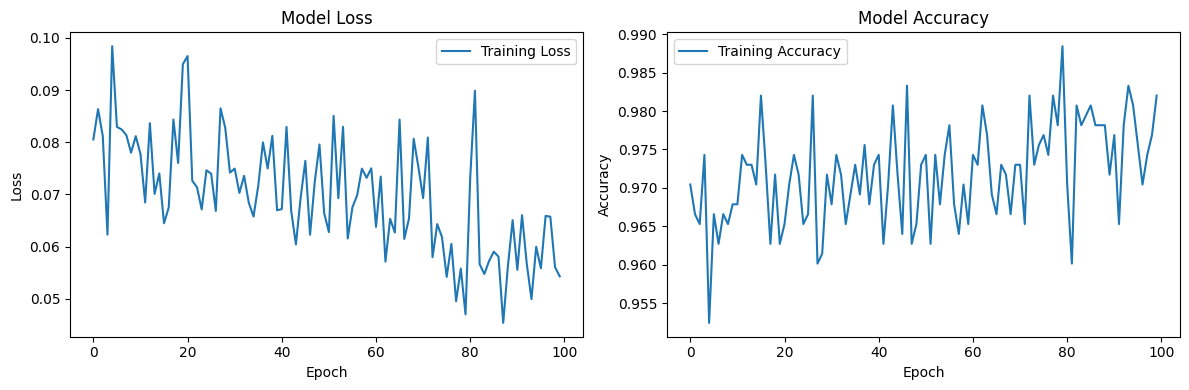

In [122]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [124]:
for layer in model.layers: print(layer.get_weights())

[array([[-0.06014334, -0.03536301,  0.08873549, ..., -0.03694538,
        -0.10226889, -0.09387776],
       [-0.09700157,  0.05212202, -0.16113766, ..., -0.16980922,
        -0.16548961, -0.1605741 ],
       [-0.15151705, -0.18835387,  0.13392276, ..., -0.12872237,
         0.0069853 , -0.016066  ],
       ...,
       [ 0.13774292,  0.15316753, -0.01610467, ...,  0.11372942,
         0.02328   ,  0.15987046],
       [-0.07720818,  0.11324404,  0.10685394, ...,  0.04702635,
         0.07318731,  0.07467124],
       [ 0.02465646, -0.08794253,  0.10158458, ...,  0.12603755,
         0.11585899,  0.12787007]], dtype=float32), array([ 0.0027043 , -0.09310014, -0.08234676, -0.07797109, -0.03850766,
       -0.08441617, -0.03825522, -0.05361584, -0.08705466, -0.11304977,
       -0.1285676 ,  0.0168977 , -0.06801558, -0.10340062,  0.02257251,
       -0.065506  , -0.17205712, -0.1820358 , -0.14909494,  0.02522833,
       -0.17774774, -0.07229719, -0.01652826, -0.01414163, -0.09110577,
       -0.

Якщо порівнювати результати з минулими лабораторними, то тут результати кращі. Це може свідчити про те, що я не вмію так само гарно писати ті моделькі, як це вміють творці тензорфлоу та карася.

## 2. Згорткові нейронні мережі

In [180]:
consts = {
    "height": 256,
    "width": 256,
    "batch_size": 32,
    "num_classes": 4
}

In [132]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

train_path = os.path.join(path, "Training")
test_path = os.path.join(path, "Testing")

Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [136]:
inputs = Input(shape=(consts["height"], consts["width"], 3))
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_tensor=inputs
)

base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


In [181]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(consts["num_classes"], activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

In [182]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.7, 1.4],
    fill_mode='nearest',
    validation_split=0.3
)

In [183]:
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

In [184]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(consts["height"], consts["width"]),
    batch_size=consts['batch_size'],
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.


In [185]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(consts["height"], consts["width"]),
    batch_size=consts['batch_size'],
    class_mode='categorical'
)

Found 1311 images belonging to 4 classes.


In [186]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [187]:
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator,
)

Epoch 1/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.6060 - loss: 1.0823 - val_accuracy: 0.7879 - val_loss: 0.5466
Epoch 2/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8098 - loss: 0.5378 - val_accuracy: 0.8345 - val_loss: 0.4391


In [189]:
evaluation = model.evaluate(test_generator)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])


41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8284 - loss: 0.4361
Loss: 0.4390626549720764
Accuracy: 0.8344774842262268


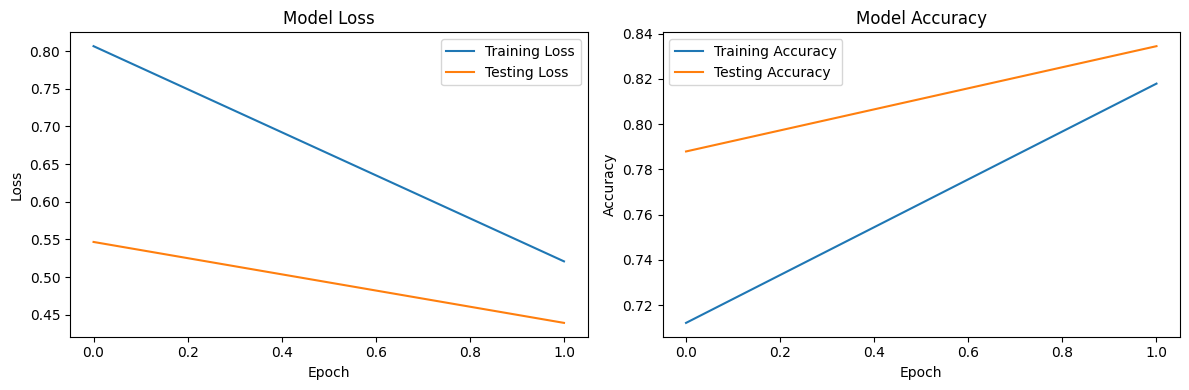

In [190]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Confusion Matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step


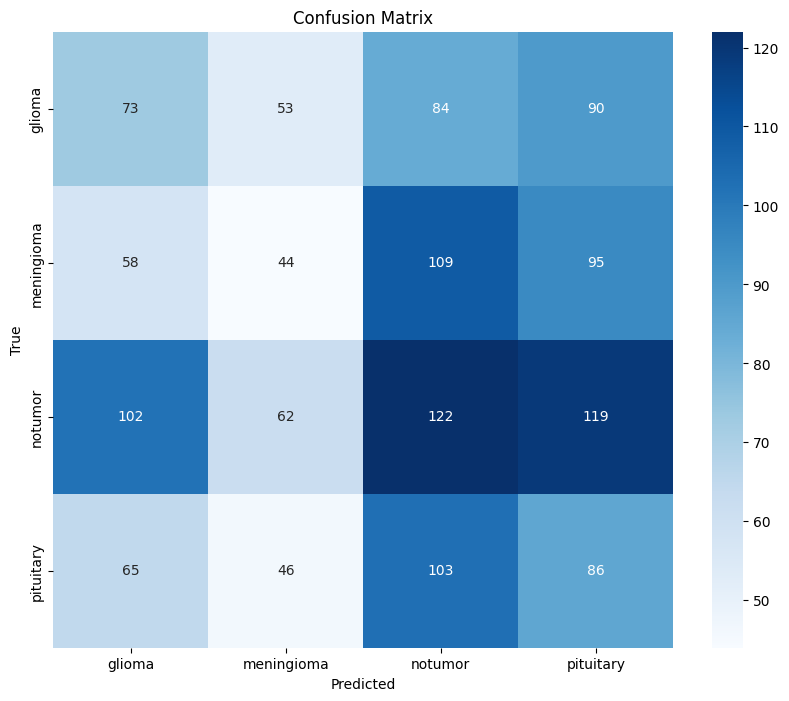

In [193]:
predictions = model.predict(test_generator)
pred_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## б) застосуйте перенесення навчання (transfer learning from pre-trained weights)

In [196]:
base_model.trainable = True

In [197]:
for layer in base_model.layers[:-50]:
    layer.trainable = False

In [198]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [200]:
history2 = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator,
)

Epoch 1/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.7239 - loss: 0.7935 - val_accuracy: 0.8215 - val_loss: 0.5508
Epoch 2/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7722 - loss: 0.6307 - val_accuracy: 0.8207 - val_loss: 0.5454


In [203]:
evaluation = model.evaluate(test_generator)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8116 - loss: 0.5755
Loss: 0.5454367399215698
Accuracy: 0.8207474946975708


In [204]:
history_combined = {
    'loss': history.history['loss'] + history2.history['loss'],
    'val_loss': history.history['val_loss'] + history2.history['val_loss'],
    'accuracy': history.history['accuracy'] + history2.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'] + history2.history['val_accuracy']
}

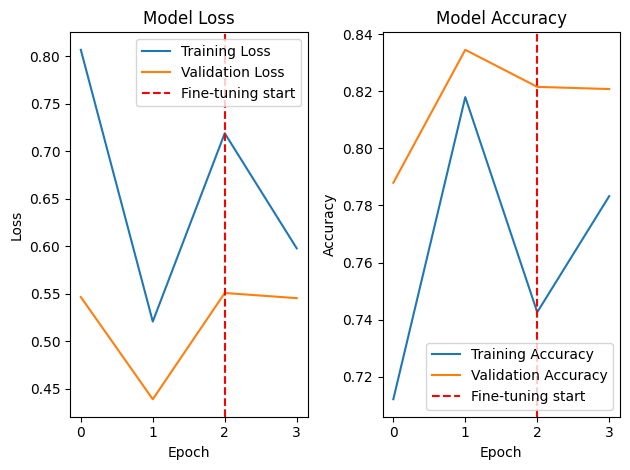

In [205]:
plt.subplot(1, 2, 1)
plt.plot(history_combined['loss'], label='Training Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.axvline(x=len(history.history['loss']), color='r', linestyle='--', label='Fine-tuning start')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_combined['accuracy'], label='Training Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=len(history.history['accuracy']), color='r', linestyle='--', label='Fine-tuning start')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step


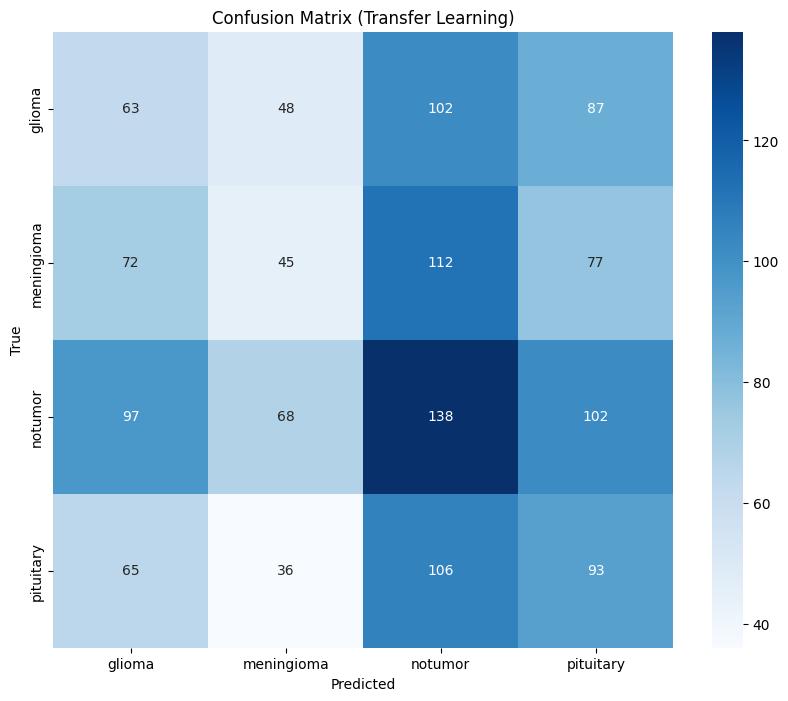

In [207]:
predictions = model.predict(test_generator)
pred_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

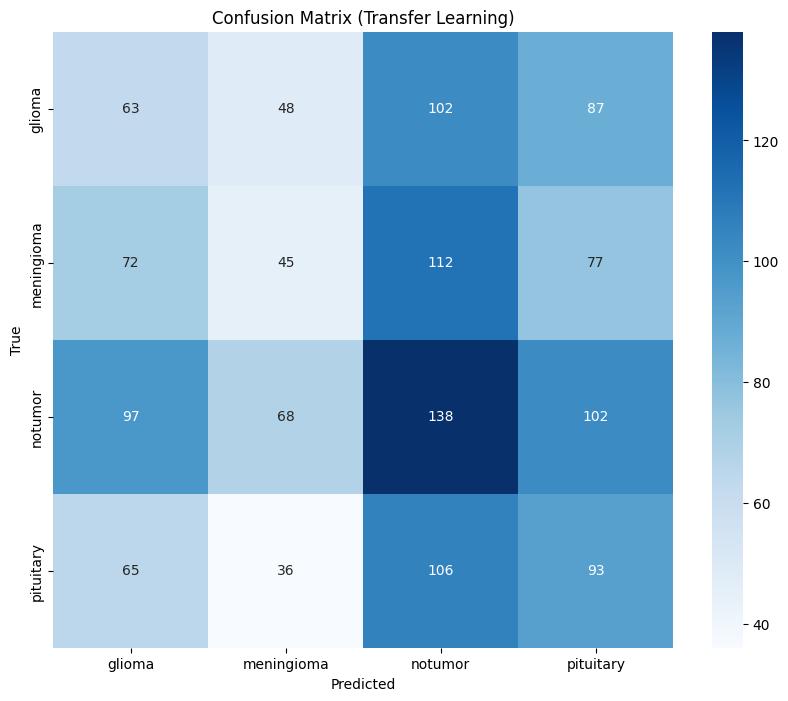

In [208]:
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.title('Confusion Matrix (Transfer Learning)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 3. Рекурентні нейронні мережі

In [7]:
path = kagglehub.dataset_download("sunilthite/text-document-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/sunilthite/text-document-classification-dataset/versions/1


In [11]:
data = pd.read_csv(os.path.join(path, "df_file.csv"))
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [13]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['Text'])

In [14]:
sequences = tokenizer.texts_to_sequences(data['Text'])
X = pad_sequences(sequences, maxlen=100)
y = data['Label'].values

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
model = models.Sequential([
    layers.Embedding(10000, 100, input_length=100),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/home/teebeeaf/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [224]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [225]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.3,
    callbacks=callbacks
)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.2286 - loss: -1.9331 - val_accuracy: 0.2303 - val_loss: -19.4223 - learning_rate: 0.0010
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.2420 - loss: -23.4006 - val_accuracy: 0.2303 - val_loss: -48.7994 - learning_rate: 0.0010
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.2420 - loss: -52.0597 - val_accuracy: 0.2303 - val_loss: -89.7127 - learning_rate: 0.0010
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.2420 - loss: -90.8646 - val_accuracy: 0.2303 - val_loss: -142.4751 - learning_rate: 0.0010
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.2420 - loss: -139.3367 - val_accuracy: 0.2303 - val_loss: -207.1040 - learning_rate: 0.0010
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.2420 - loss: -196.3219 - val_accuracy: 0.2303 - val_loss: -283.8661 - learning_rate: 0.0010
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accur

In [226]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"{test_accuracy=}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3040 - loss: -2168.9529
test_accuracy=0.2719101011753082


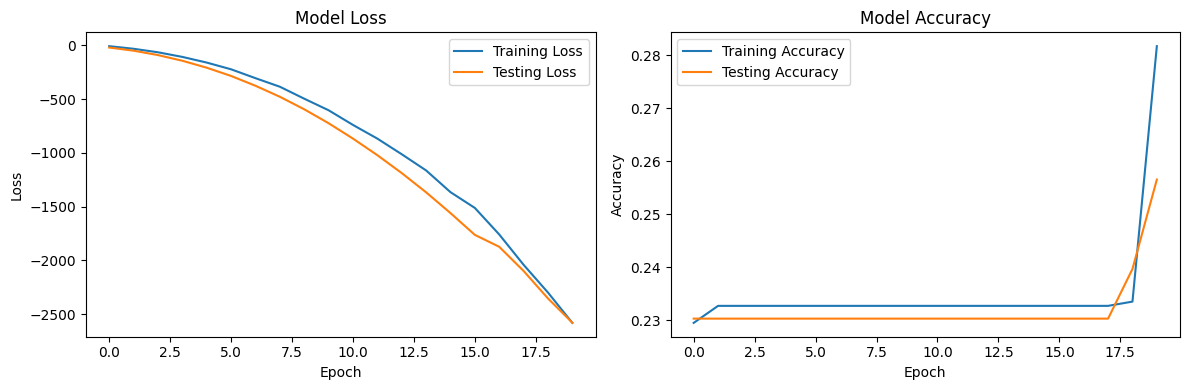

In [228]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step 


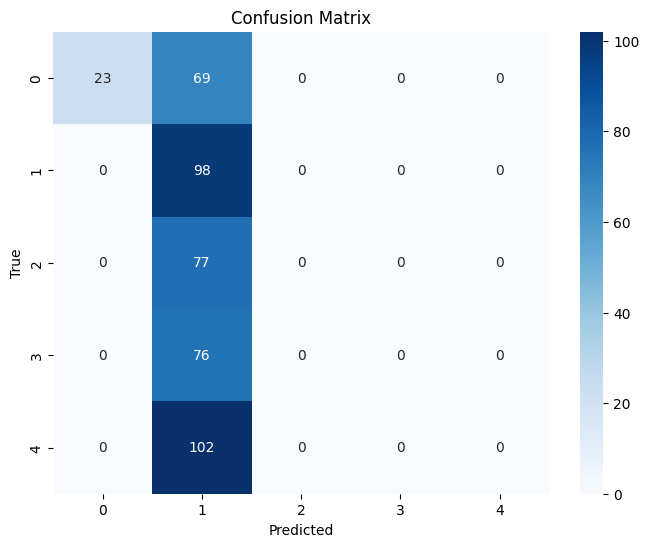

In [229]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## б) використовуючи pretrained word embeddings

In [15]:
import gensim.downloader as api

word2vec = api.load('word2vec-google-news-300')


In [17]:
embedding_matrix = np.zeros((10000, 300))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        try:
            embedding_vector = word2vec[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            continue

In [18]:
sequences = tokenizer.texts_to_sequences(data['Text'])
X = pad_sequences(sequences, maxlen=100)
y = data['Label'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = models.Sequential([
        layers.Embedding(10000, 300, 
                        weights=[embedding_matrix],
                        input_length=100,
                        trainable=False),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

/home/teebeeaf/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-27 16:35:53.638292: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.3,
)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.2286 - loss: -3.6330 - val_accuracy: 0.2303 - val_loss: -23.4686
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.2420 - loss: -27.8474 - val_accuracy: 0.2303 - val_loss: -58.1311
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.2420 - loss: -61.4867 - val_accuracy: 0.2303 - val_loss: -102.8642
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.2420 - loss: -102.1768 - val_accuracy: 0.2303 - val_loss: -159.0665
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.2420 - loss: -151.8306 - val_accuracy: 0.2303 - val_loss: -227.7264
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.2420 - loss: -222.2615 - val_accuracy: 0.2303 - val_loss: -311.1033
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.2420 - loss: -298.7701 - val_accuracy: 0.2303 - val_loss: -408.1756
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.2

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"{test_accuracy=}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2414 - loss: -2207.3398
test_accuracy=0.22022472321987152


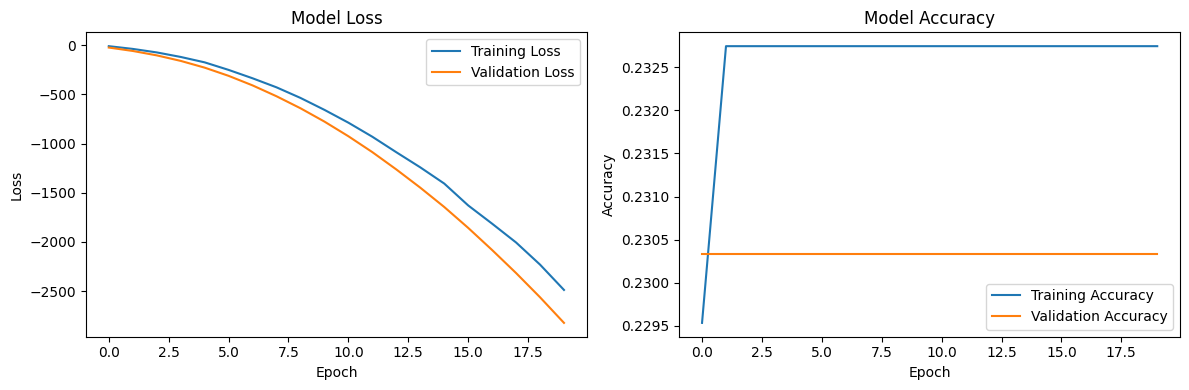

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step 


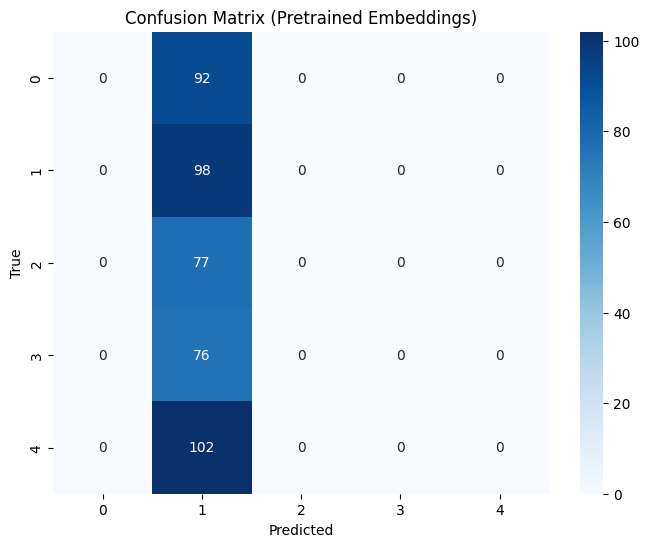

In [27]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Pretrained Embeddings)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()